## `Exploratory Data Analysis (EDA) project`
### `Lending Club Case Study`
Lending Club is suferring from Default. It has now decided to find out what features/attributes of their customer (data) influence the Default probability. 
We are to perform an Exploratory Data Analysis to find that. 

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore") 

### `Import the .csv file into a Pandas DataFrame`

In [3]:
# Import the csv file containing input - Loan data

loan_work = pd.read_csv("loan.csv", encoding ="ISO-8859-1")
loan = loan_work.copy(deep=True)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `Drop Unnecessary Features`

In [4]:
# Clean Unnecessary Fields

loan = loan.drop([
'acc_now_delinq'
,'acc_open_past_24mths'
,'all_util'
,'annual_inc_joint'
,'application_type'
,'avg_cur_bal'
,'bc_open_to_buy'
,'bc_util'
,'chargeoff_within_12_mths'
,'collection_recovery_fee'
,'collections_12_mths_ex_med'
,'delinq_2yrs'
,'delinq_amnt'
,'desc'
,'dti_joint'
,'earliest_cr_line'
,'home_ownership'
,'id'
,'il_util'
,'initial_list_status'
,'inq_fi'
,'inq_last_12m'
,'max_bal_bc'
,'member_id'
,'mo_sin_old_il_acct'
,'mo_sin_old_rev_tl_op'
,'mo_sin_rcnt_rev_tl_op'
,'mo_sin_rcnt_tl'
,'mort_acc'
,'mths_since_last_delinq'
,'mths_since_last_major_derog'
,'mths_since_last_record'
,'mths_since_rcnt_il'
,'mths_since_recent_bc'
,'mths_since_recent_bc_dlq'
,'mths_since_recent_inq'
,'mths_since_recent_revol_delinq'
,'num_accts_ever_120_pd'
,'num_actv_bc_tl'
,'num_actv_rev_tl'
,'num_bc_sats'
,'num_bc_tl'
,'num_il_tl'
,'num_op_rev_tl'
,'num_rev_accts'
,'num_rev_tl_bal_gt_0'
,'num_sats'
,'num_tl_120dpd_2m'
,'num_tl_30dpd'
,'num_tl_90g_dpd_24m'
,'num_tl_op_past_12m'
,'open_acc_6m'
,'open_il_12m'
,'open_il_24m'
,'open_il_6m'
,'open_rv_12m'
,'open_rv_24m'
,'out_prncp'
,'out_prncp_inv'
,'pct_tl_nvr_dlq'
,'percent_bc_gt_75'
,'policy_code'
,'pymnt_plan'
,'recoveries'
,'tax_liens'
,'title'
,'tot_coll_amt'
,'tot_cur_bal'
,'tot_hi_cred_lim'
,'total_bal_ex_mort'
,'total_bal_il'
,'total_bc_limit'
,'total_cu_tl'
,'next_pymnt_d'
,'total_il_high_credit_limit'
,'total_pymnt'
,'total_pymnt_inv'
,'total_rec_int'
,'total_rec_late_fee'
,'total_rec_prncp'
,'verification_status_joint'
,'total_rev_hi_lim'
,'last_pymnt_amnt'
,'last_credit_pull_d'
,'url'], axis=1)
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,CO,11.33,0,13,0,7274,13.10%,40,Jul-10,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,NC,6.40,1,6,0,8847,26.90%,9,Jul-10,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,MA,2.30,0,11,0,9698,19.40%,20,Apr-08,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,MD,3.72,0,17,0,85607,0.70%,26,Jan-08,NaN


### `Transform a Text Label into Numeric using Apply-Lambda Function`

In [5]:
# Create new column "Defaulted" with Value 1 if Loan Status is Charged Off, otherwise 0  

loan['defaulted'] = loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [6]:
# Get a Statisctical picture on the Numerical Data

loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,defaulted
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260,0.141677
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324,0.348723
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000,1.000000


In [7]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_pymnt_d', 'pub_rec_bankruptcies', 'defaulted'],
      dtype='object')

In [8]:
# Get a glimpse of the type of individual fields

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

## `Univariate Analysis - EDA`

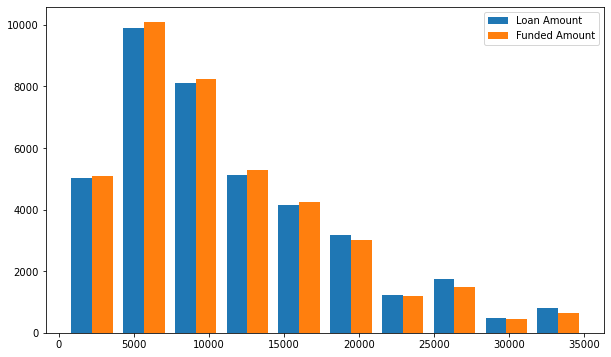

In [9]:
# Check distribution of Loan amounts and Funded Amounts

ax = plt.subplots(figsize=(10, 6))
plt.hist([loan.loan_amnt, loan.funded_amnt], label=['Loan Amount', 'Funded Amount'])
plt.legend()

<AxesSubplot:xlabel='loan_amnt'>

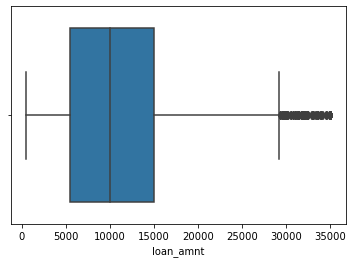

In [10]:
# Check the Distribution of Annual Incomes of Loan Takers

sns.boxplot(loan.loan_amnt)

Text(0, 0.5, 'Annual Income')

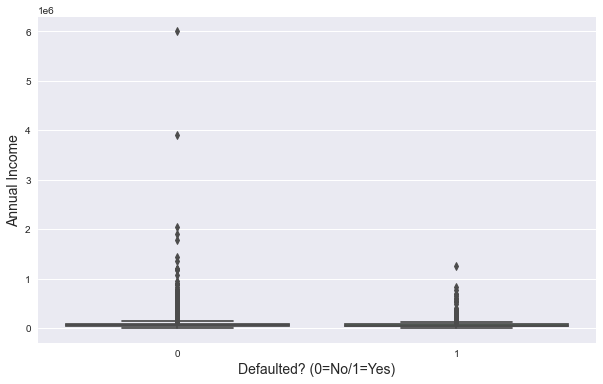

In [11]:
# Boxplot with Annual Income - Split between Defaulted and Non-Defaulted

plt.style.use('seaborn')
ax= plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="defaulted", y="annual_inc", data=loan)
ax.set_xlabel('Defaulted? (0=No/1=Yes)', fontsize=14) 
ax.set_ylabel('Annual Income', fontsize=14)

In [12]:
print("25, 50, 75, 100 Quartiles of Annual Income:", loan.quantile(q=0.25).annual_inc, loan.quantile(q=0.50).annual_inc, loan.quantile(q=0.75).annual_inc, loan.quantile(q=1).annual_inc)
print("Median of Annual Income: ", loan.annual_inc.median())

25, 50, 75, 100 Quartiles of Annual Income: 40404.0 59000.0 82300.0 6000000.0
Median of Annual Income:  59000.0


In [13]:
# Extract records with top 99% of Annual Income as max and plot again (this is remove ouliers)

total = int(round(loan.annual_inc.count()*99/100))
loan_temp = pd.DataFrame({'defaulted': loan.defaulted, 'annual_inc': loan.annual_inc})
loan_temp = loan_temp.sort_values('annual_inc')
loan_temp = loan_temp.head(total)
loan_temp

,defaulted,annual_inc
35501,0,4000.0
29283,1,4080.0
30726,0,4200.0
37709,0,4200.0
36639,0,4800.0
...,...,...
3475,0,234000.0
33036,0,234000.0
37048,0,234600.0
29878,0,234996.0


Text(0, 0.5, 'Annual Income')

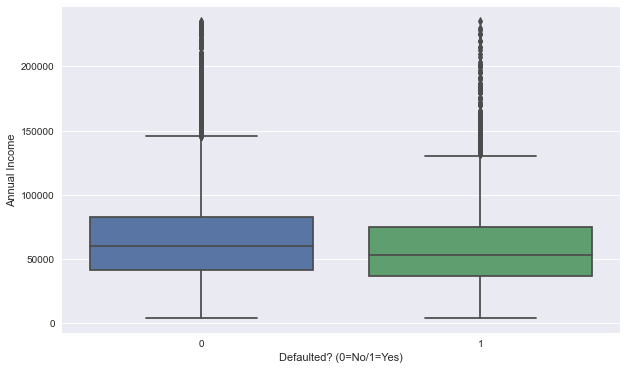

In [14]:
# Boxplot with Annual Income
ax= plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="defaulted", y="annual_inc", data=loan_temp)
ax.set_xlabel('Defaulted? (0=No/1=Yes)') 
ax.set_ylabel('Annual Income')

# Doesn't appear that there is any correlation between Annual Income and default ratio

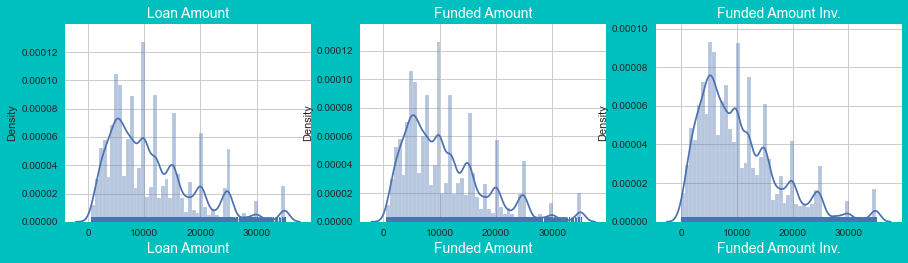

In [15]:
# Compare distribution of the three Loan Amount Fields  

plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("whitegrid")

# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv.',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# Most loans concentrated between $50K to $120K

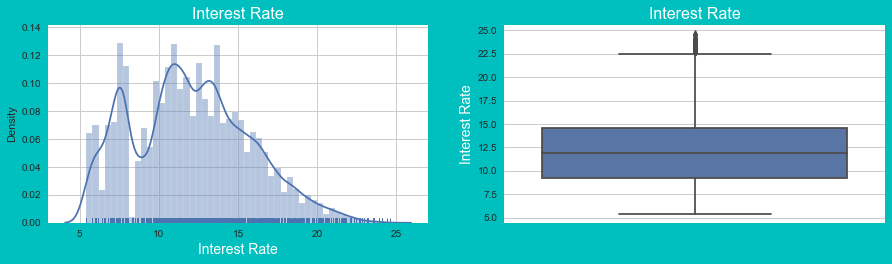

In [16]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

# Create a Numberic field with the numeric value from intrest rate
loan['int_rate_num'] = loan['int_rate'].str.rstrip('%')
loan['int_rate_num'] = pd.to_numeric(loan["int_rate_num"], downcast="float")

plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("whitegrid")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate_num'],rug = True)
ax.set_title('Interest Rate',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate_num'])
ax.set_title('Interest Rate',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

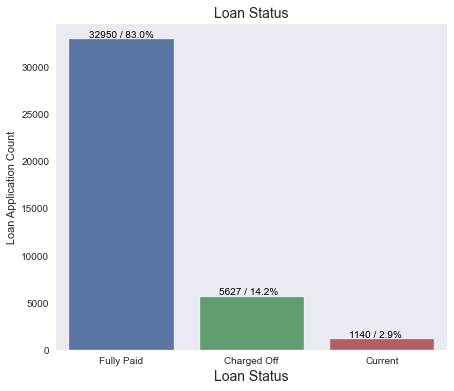

In [17]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(7,6))
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan)
ax.set_title('Loan Status',fontsize=14)
ax.set_xlabel('Loan Status',fontsize=14)
ax.set_ylabel('Loan Application Count')      

# To show count of values above bars
s = loan['loan_status'].value_counts()
tot = s.sum()
for i, v in s.reset_index().iterrows():
    txt = str(v.loan_status) + " / " + str(round(v.loan_status/tot*100, 1)) + '%'
    ax.text(i - 0.25, v.loan_status + 200, txt, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

## `Multi-variate Analysis - EDA`

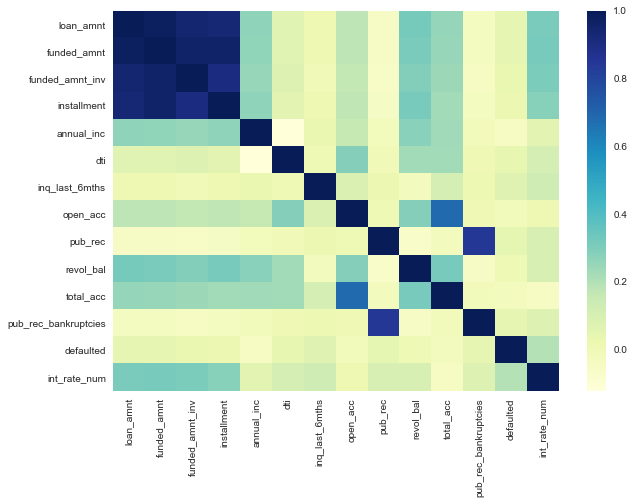

In [18]:
# Examine co-relations between numeric fields

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(loan.corr(), cmap="YlGnBu")
plt.show()

# Observations:
# 1. There are obvious correlations between the three loan amounts. 
# 2. There are strong correlation between pub_rec and pub_rec_bankruptcies fields

In [19]:
# Find out the number of Null values in invididual columns in the data

loan.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_pymnt_d              71
pub_rec_bankruptcies     697
defaulted                  0
int_rate_num               0
dtype: int64

In [20]:
# Find out which fields with high percentage of null values

a = (loan.isnull().sum() / loan.shape[0]) * 100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'], ascending=False)

,Percentage of null values
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
revol_util,0.125891


### `Unique values in each categorical feature`

In [21]:
# Get a Count of Unique Values across Non Numeric Variables

for i in loan.columns[loan.dtypes == 'object']:
    print(loan[i].value_counts())
    print('--------------------------------')

 36 months    29096
 60 months    10621
Name: term, dtype: int64
--------------------------------
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
24.59%      1
14.67%      1
16.15%      1
24.40%      1
17.46%      1
Name: int_rate, Length: 371, dtype: int64
--------------------------------
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64
--------------------------------
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64
--------------------------------
US Army                         134
Bank of America                 109
IBM              

### `Feature Exgineering - introduce a Bin-based categorical Feature`

In [23]:
# Count the Numbers of Defaulted vs non-Defaulted in various income brackets (bins)

# Apply Binning on Annual Income ['0-30000, 30000-60000, 60000-100000, 100000+]

loan_temp['anninc_bin'] = 'NB'
loan_temp['annual_inc'] = loan_temp['annual_inc'].astype(int)

def bininc(incparam):
    if incparam >= 0 and incparam < 30000:
        return '0-30K'
    elif incparam >= 30000 and incparam < 60000:
        return '30-60K'
    elif incparam >= 60000 and incparam < 100000:
        return '60-100K'
    elif incparam >= 100000:
        return '100K+'

loan_temp['anninc_bin'] = loan.annual_inc.apply(bininc) 


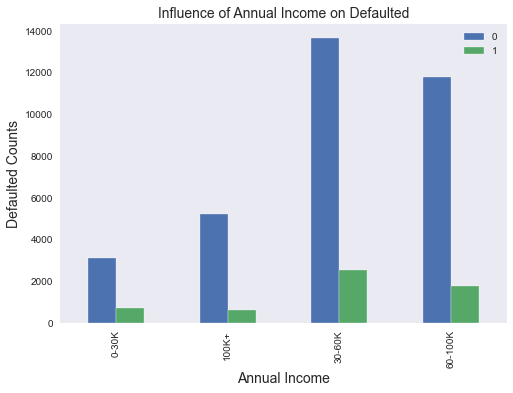

In [24]:
# Correlation between Annual Income and Defaulted after Binning Annual Income

pd.crosstab(loan_temp.anninc_bin,loan_temp.defaulted).plot(kind='bar')
plt.title('Influence of Annual Income on Defaulted', fontsize=14)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Defaulted Counts', fontsize=14)
plt.legend()

[Text(0, 0, '0-30K'),
 Text(1, 0, '100K+'),
 Text(2, 0, '30-60K'),
 Text(3, 0, '60-100K')]

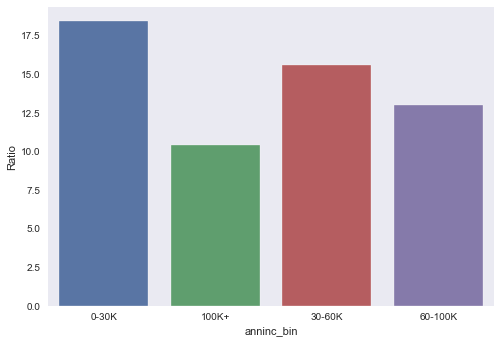

In [25]:
# Plot Annual_income brackets and Ratio of Default in these brackets

df_anninc = loan_temp[loan_temp.defaulted == 1].groupby(['anninc_bin']).defaulted.count().reset_index()
df_aninctot = loan_temp.groupby(['anninc_bin'])[['defaulted']].count().reset_index()
df_anincfull = pd.merge(df_anninc, df_aninctot, left_on='anninc_bin', right_on='anninc_bin', how='left')
df_anincfull['Ratio'] = df_anincfull.defaulted_x/df_anincfull.defaulted_y*100
ax = sns.barplot(x=df_anincfull.anninc_bin, y=df_anincfull.Ratio)
ax.set_xticklabels(df_anincfull.anninc_bin)

# Observation: The default ratio of borrowers in the Income bracket of 0-30K is high. 

In [26]:
df_anincfull

,anninc_bin,defaulted_x,defaulted_y,Ratio
0,0-30K,700,3799,18.425902
1,100K+,602,5803,10.373945
2,30-60K,2524,16181,15.598541
3,60-100K,1759,13537,12.994016


In [27]:
# Apply Binning on funded amount ['0-10K', '10-20K', '20K+'']

loan['famnt'] = 0
loan['funded_amnt'] = loan['funded_amnt'].astype(int)
def binfamt(dfamt): 
    if dfamt >= 0 and dfamt < 10000:
        return '0-10K'
    elif dfamt >= 10000 and dfamt < 20000:
        return '10-20K'
    elif dfamt >= 20000:
        return '20K+'

loan['famnt'] = loan.funded_amnt.apply(binfamt) 
loan['famnt']

0         0-10K
1         0-10K
2         0-10K
3        10-20K
4         0-10K
          ...  
39712     0-10K
39713     0-10K
39714     0-10K
39715     0-10K
39716     0-10K
Name: famnt, Length: 39717, dtype: object

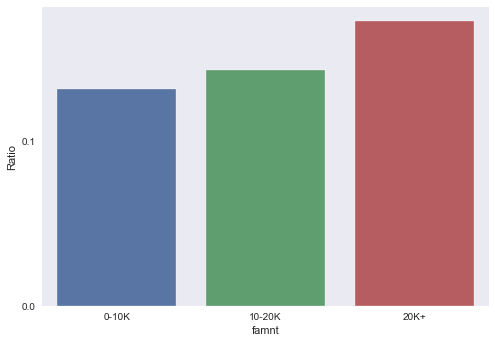

In [28]:
# Plot against Ratio of Default and Funded Amount

dtidef = loan[loan.defaulted == 1].groupby(['famnt'])[['defaulted']].count().reset_index()
dtitot = loan.groupby(['famnt'])[['defaulted']].count().reset_index()
dtifull = pd.merge(dtidef, dtitot, left_on='famnt', right_on='famnt', how='left')
dtifull.rename(columns={"defaulted_x": "Defaulted", "defaulted_y": "Totals"})
dtifull['Ratio'] = dtifull.defaulted_x/dtifull.defaulted_y
dtifull
ax = sns.barplot(x=dtifull.famnt, y=dtifull.Ratio)
sns.set(font_scale = 5)

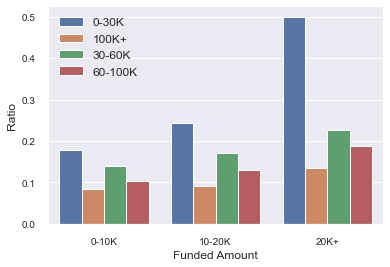

In [67]:
# Create a combination of Funded Amount and Annual Income and find Infleunce of this Combination on Default
# famnt - is the field in Loan DF that has bin tags on Funded Amount
# anninc_bin - is the field in Loan DF that has bin tags on Annual Income

def bininc(incparam):
    if incparam >= 0 and incparam < 30000:
        return '0-30K'
    elif incparam >= 30000 and incparam < 60000:
        return '30-60K'
    elif incparam >= 60000 and incparam < 100000:
        return '60-100K'
    elif incparam >= 100000:
        return '100K+'  
    
loan['anninc_bin'] = loan.annual_inc.apply(bininc)

fmnt_ainc = loan[loan.defaulted == 1].groupby(['famnt', 'anninc_bin'])[['defaulted']].count().reset_index()

df_fa = loan.groupby(['famnt', 'anninc_bin'])[['defaulted']].count().reset_index()

fafull = pd.merge(fmnt_ainc, df_fa, left_on=['famnt', 'anninc_bin'], right_on=['famnt', 'anninc_bin'], how='left')
fafull['Ratio'] = fafull.defaulted_x/fafull.defaulted_y
fafull

ax = sns.barplot(x="famnt", hue="anninc_bin", y="Ratio", data=fafull)

plt.xlabel('Funded Amount', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

# Observation: For the Funded Amount Bracket of 20K+, there is an exceptionally high ratio of 50% for borrowers
# in the income bracket of 0-30K. However, exaination of the data reveals that that was only 1 default 
# out of 2 borrower in that category.

In [30]:
fafull

,famnt,anninc_bin,defaulted_x,defaulted_y,Ratio
0,0-10K,0-30K,604,3407,0.177282
1,0-10K,100K+,138,1654,0.083434
2,0-10K,30-60K,1334,9524,0.140067
3,0-10K,60-100K,571,5486,0.104083
4,10-20K,0-30K,95,390,0.243590
5,10-20K,100K+,215,2374,0.090564
6,10-20K,30-60K,994,5792,0.171616
7,10-20K,60-100K,709,5504,0.128815
8,20K+,0-30K,1,2,0.500000
9,20K+,100K+,291,2172,0.133978


In [32]:
# Compare Means of Fields between Defaulted 1 and 0
loan.groupby('defaulted').mean().round()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,int_rate_num
defaulted,,,,,,,,,,,,,
0,11073.0,10815.0,10320.0,323.0,70049.0,13.0,1.0,9.0,0.0,13361.0,22.0,0.0,12.0
1,12104.0,11753.0,10865.0,336.0,62427.0,14.0,1.0,9.0,0.0,13514.0,21.0,0.0,14.0


In [33]:
# Is there any significant difference between Requested Loan Amount and Funded/Disbursed Amount - 
# calculated in percentages

print(((loan.loan_amnt-loan.funded_amnt)/loan.loan_amnt).sort_values(ascending=False).head(10))
print(((loan.loan_amnt-loan.funded_amnt)/loan.loan_amnt).sort_values(ascending=False).tail(10))

23556    0.898750
23296    0.897500
23288    0.889286
23416    0.867500
23337    0.847500
38840    0.845313
23349    0.841071
36894    0.841000
36897    0.830556
38731    0.817000
dtype: float64
26270    0.0
26268    0.0
26261    0.0
26267    0.0
26266    0.0
26265    0.0
26264    0.0
26263    0.0
26262    0.0
0        0.0
dtype: float64


### `Find correlation between Default status and Grade/Sub-Grades of Loans`

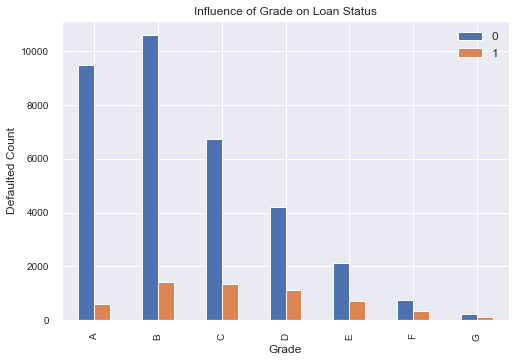

In [34]:
# Correlation between Grade of Loan and Defaulted

ct = pd.crosstab(loan.grade,loan.defaulted)
ct.plot(kind='bar')
plt.title('Influence of Grade on Loan Status', fontsize=12)

plt.xlabel('Grade', fontsize=12)
plt.ylabel('Defaulted Count', fontsize=12)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

# Observation: The default ratio is fairly proportional to the total in each Grade. 
# None of the individual grades stand out as exception in default ratio. 

In [35]:
ct['ratio'] = (ct[1]/ct[0]*100).round(2)
ct

defaulted,0,1,ratio
grade,,,
A,9483,602,6.35
B,10595,1425,13.45
C,6751,1347,19.95
D,4189,1118,26.69
E,2127,715,33.62
F,730,319,43.70
G,215,101,46.98


In [36]:
# Observation: Grade G, F, E, D have very high Default ratio

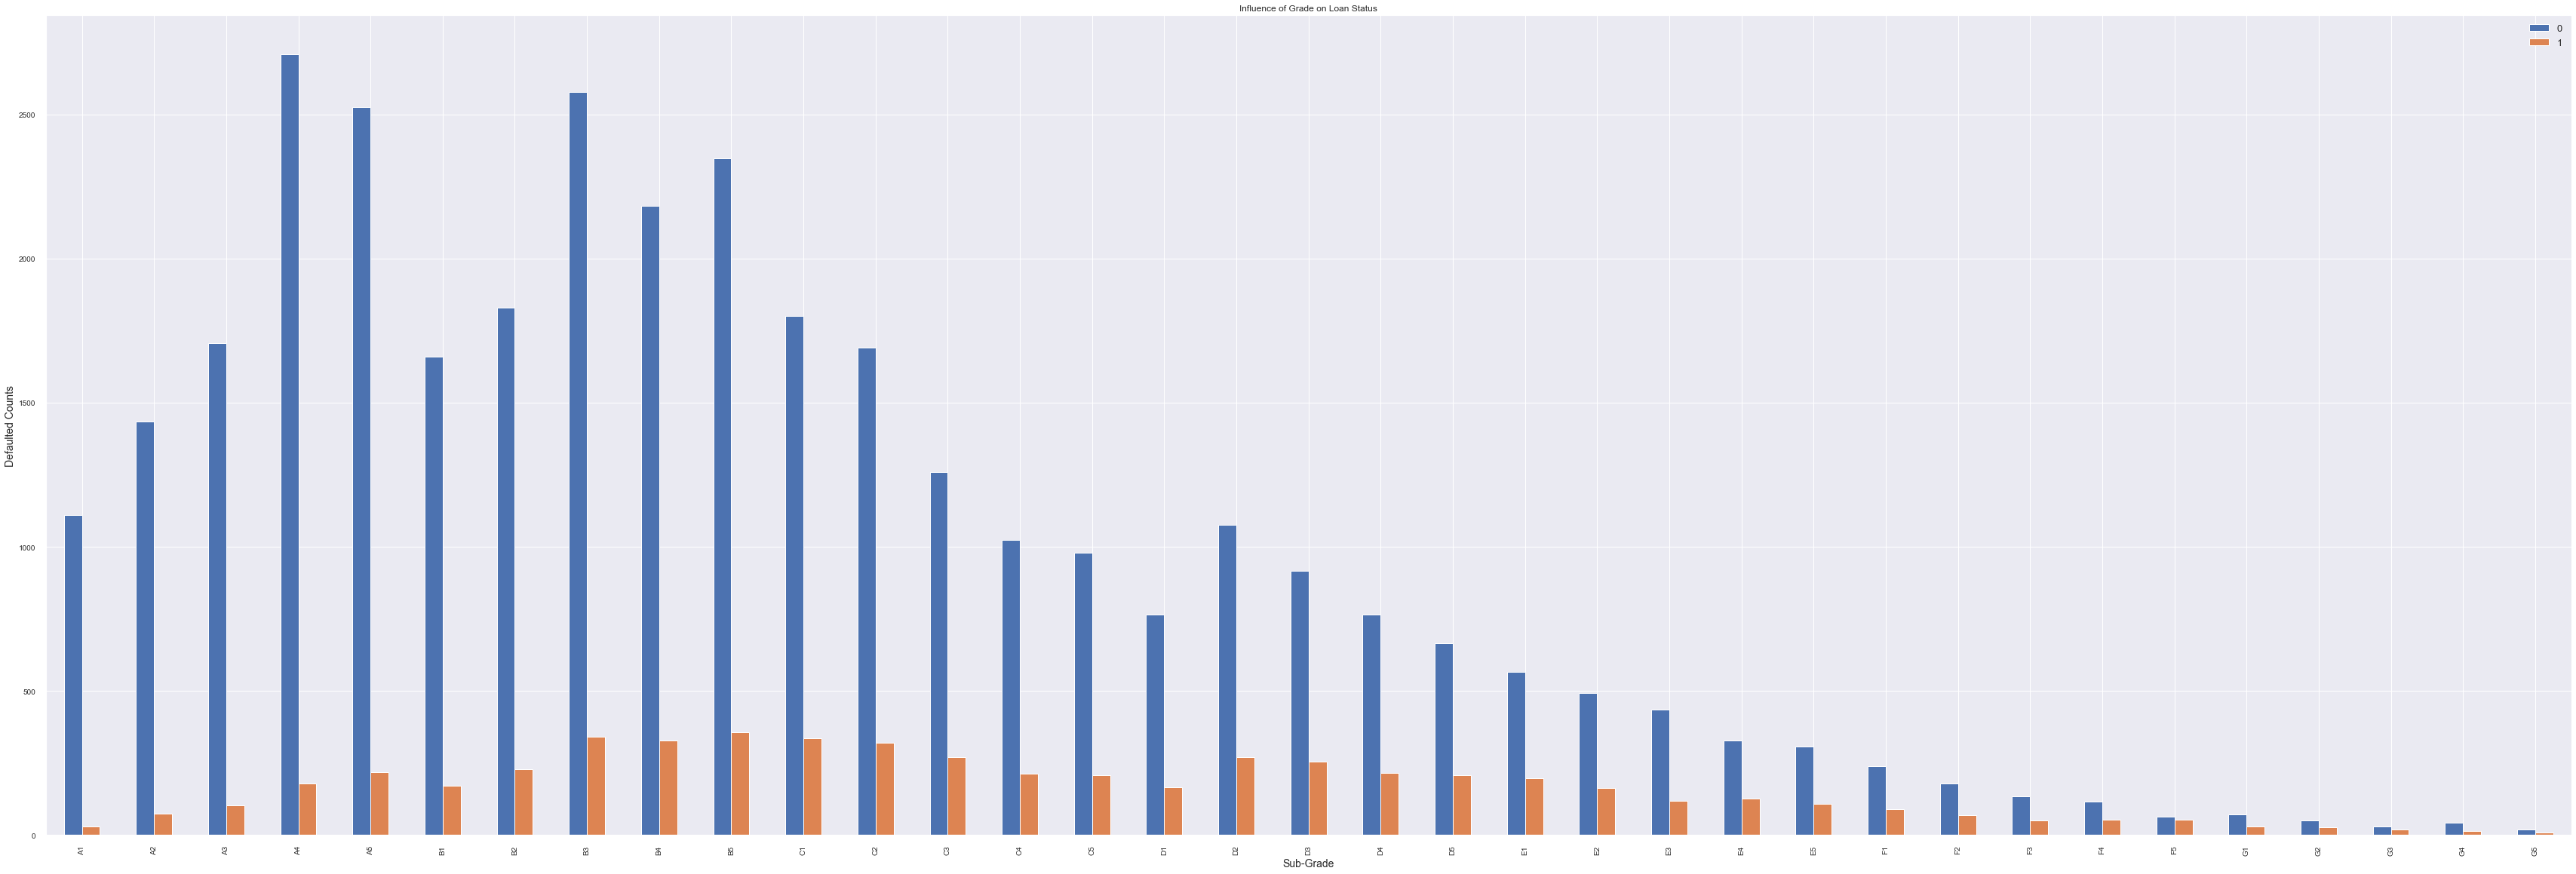

In [68]:
# Correlation between Sub-Grade of Loan and Defaulted

ct = pd.crosstab(loan.sub_grade,loan.defaulted)
ct.plot(kind='bar', figsize=(60,20))
plt.title('Influence of Grade on Loan Status', fontsize=12)
plt.xlabel('Sub-Grade', fontsize=14)
plt.ylabel('Defaulted Counts', fontsize=14)
plt.legend(fontsize=13)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

# Observation: The default ratio is fairly proportional to the total in each Grade. 
# None of the individual grades stand out as exception in default ratio. 

In [38]:
ct['ratio'] = (ct[1]/ct[0]*100).round(2)
ct

defaulted,0,1,ratio
sub_grade,,,
A1,1109,30,2.71
A2,1434,74,5.16
A3,1707,103,6.03
A4,2708,178,6.57
A5,2525,217,8.59
B1,1659,171,10.31
B2,1829,228,12.47
B3,2576,341,13.24
B4,2183,329,15.07


In [39]:
# Observations: Some of the Sub-grade of Loans have very high Default rate

### `Find correlation between Default and State`

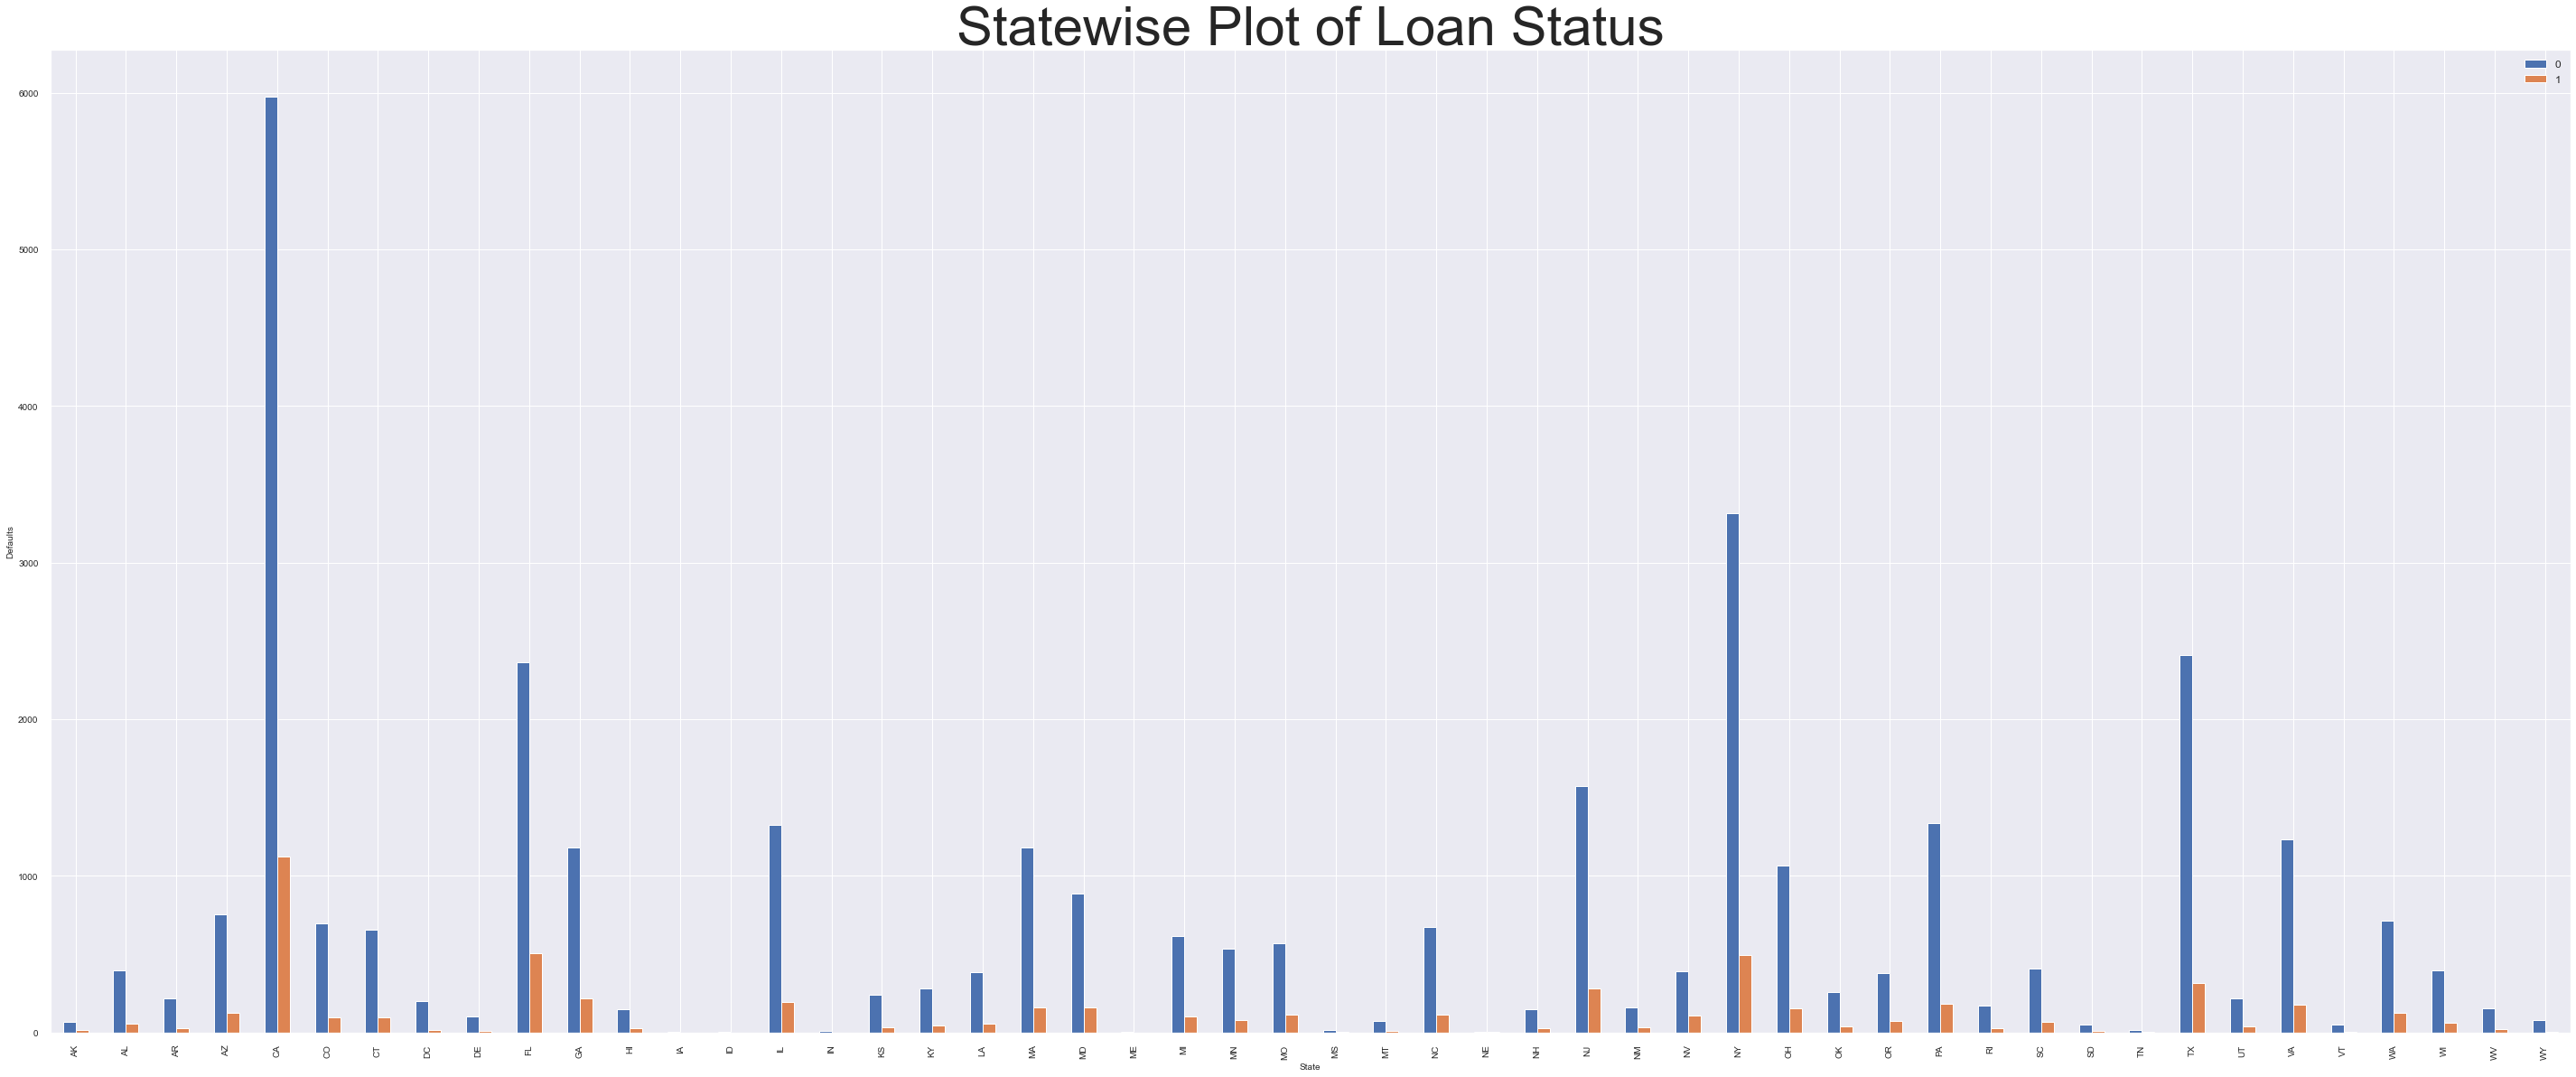

In [40]:
# Plot Relation between "loan_status" and "state"

pd.crosstab(loan.addr_state.str.upper(),loan.defaulted).plot(kind='bar', figsize=(50,20))
plt.title('Statewise Plot of Loan Status')
plt.xlabel('State', fontsize=10)
plt.ylabel('Defaults', fontsize=10)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

# Observation: The default ratio is fairly proportional to the total in each State. 
# None of the individual States stand out as exception in default ratio. 

[Text(0, 0, ' 36 months'), Text(1, 0, ' 60 months')]

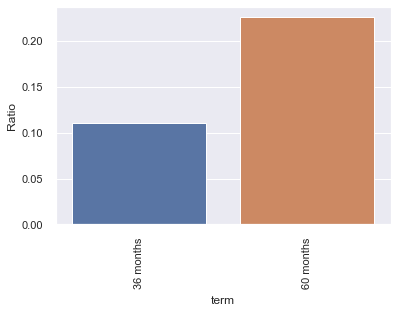

In [70]:
# Plot against Ratio of Default and Term

df_term = loan[loan.defaulted == 1].groupby(['term'])[['defaulted']].count().reset_index()
df_trmtot = loan.groupby(['term'])[['defaulted']].count().reset_index()
df_trmfull = pd.merge(df_term, df_trmtot, left_on='term', right_on='term', how='left')
df_trmfull['Ratio'] = df_trmfull.defaulted_x/df_trmfull.defaulted_y
ax = sns.barplot(x=df_trmfull.term, y=df_trmfull.Ratio)
sns.set(font_scale = 1)
ax.set_xticklabels(df_trmfull.term, rotation=90)

# Observation: 60 month tenured loans have much higher default rate

### `Finding any corelation between employer and default ratio`

In [42]:
# List the companies from where the most number of defaulted individuals come from

loan.emp_title.value_counts().head(20)

US Army                    134
Bank of America            109
IBM                         66
AT&T                        59
Kaiser Permanente           56
Wells Fargo                 54
USAF                        54
UPS                         53
US Air Force                52
Walmart                     45
Lockheed Martin             44
State of California         42
United States Air Force     42
U.S. Army                   41
Verizon Wireless            40
Self Employed               40
US ARMY                     39
USPS                        39
Walgreens                   38
JP Morgan Chase             37
Name: emp_title, dtype: int64

In [43]:
# Find out Companywise Default ratio for companies occurring > 20 and highest ratio of Default 
# to find if there is any correlation to companies

loan.emp_title = loan.emp_title.str.upper()
employers = loan.groupby(['emp_title'])['defaulted'].count()
employers = employers.reset_index().sort_values('defaulted', ascending=False)
emp_defaults = loan.groupby(['emp_title'])['defaulted'].sum()
emp_defaults = emp_defaults.reset_index().sort_values('defaulted', ascending=False)
employers.rename(columns = {'defaulted': "Totals"}, inplace=True)
employers_f = pd.merge(employers, emp_defaults, left_on='emp_title', right_on='emp_title')
employers_f['Default_Ratio'] = round(employers_f.defaulted/employers_f.Totals*100, 4)
employers_f = employers_f.sort_values('Default_Ratio', ascending=False)
employers_f[employers_f.Totals > 20]

# Observation: Staff from some of the employers have high propensity of default. 

,emp_title,Totals,defaulted,Default_Ratio
8,UPS,63,17,26.9841
47,WAL-MART,24,6,25.0000
2,WALMART,81,20,24.6914
37,RETIRED,33,8,24.2424
58,INTERNAL REVENUE SERVICE,21,5,23.8095
27,UNITED STATES POSTAL SERVICE,38,9,23.6842
54,US BANK,22,5,22.7273
19,US POSTAL SERVICE,45,10,22.2222
30,SELF-EMPLOYED,36,8,22.2222
50,SPRINT,23,5,21.7391


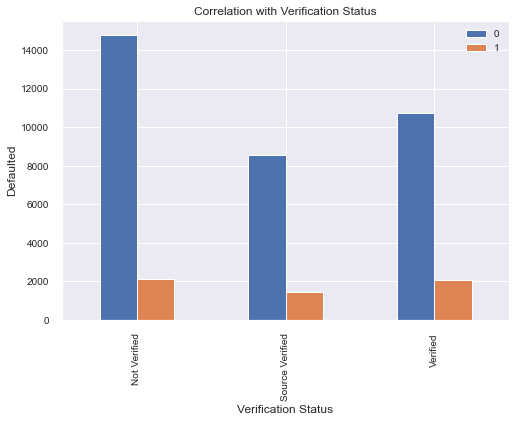

In [44]:
# Plot against Verification Status

pd.crosstab(loan.verification_status,loan.defaulted).plot(kind='bar')
plt.title('Correlation with Verification Status', fontsize=12)
plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Defaulted', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)


# Observation: The default ratio is fairly proportional to the total in each Category of Verification Status. 
# None of the individual Verification Status stand out as exception in default ratio. 

In [45]:
temp = pd.crosstab(loan.verification_status,loan.defaulted)
temp['ratio'] = temp[1]/temp[0]*100
temp

# Observation: Stangely, 'Verified' loans have a higher default ratio 

defaulted,0,1,ratio
verification_status,,,
Not Verified,14779,2142,14.493538
Source Verified,8553,1434,16.766047
Verified,10758,2051,19.064882


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

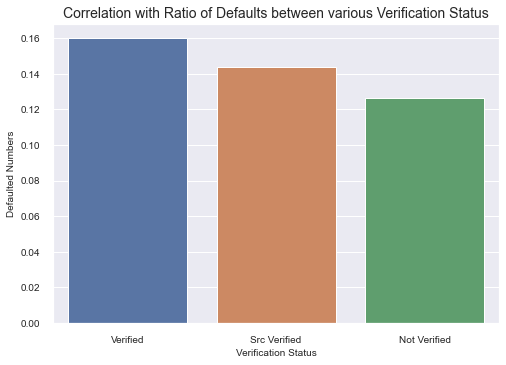

In [46]:
# Plot against Ratio of Default and Verification Status

loan_verified = loan[(loan.verification_status == 'Verified') & (loan.defaulted == 1)].verification_status.count()/loan[loan.verification_status == 'Verified'].verification_status.count()
loan_srcverified = loan[(loan.verification_status == 'Source Verified') & (loan.defaulted == 1)].verification_status.count()/loan[loan.verification_status == 'Source Verified'].verification_status.count()
loan_notverified = loan[(loan.verification_status == 'Not Verified') & (loan.defaulted == 1)].verification_status.count()/loan[loan.verification_status == 'Not Verified'].verification_status.count()

ax = sns.barplot(x=['Verified', 'Src Verified', 'Not Verified'], y=[loan_verified, loan_srcverified, loan_notverified])
plt.title('Correlation with Ratio of Defaults between various Verification Status', fontsize=14)
plt.xlabel('Verification Status', fontsize=10)
plt.ylabel('Defaulted Numbers', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


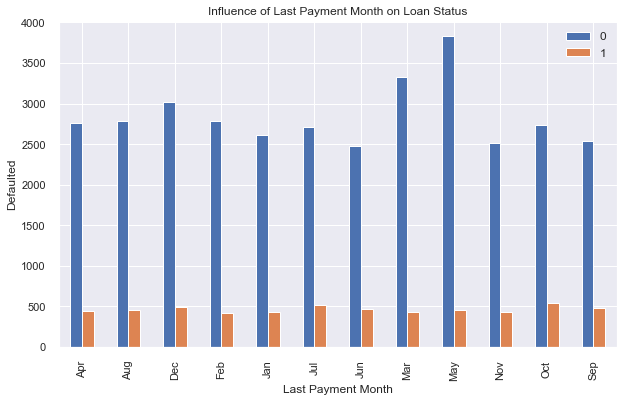

In [47]:
# Plot againt the month name to find if there is a cyclical influence

import datetime
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')

loan['month_last_pymnt'] = loan['last_pymnt_d'].dt.strftime("%b")

pd.crosstab(loan.month_last_pymnt,loan.defaulted).plot(kind='bar', figsize=(10,6))
plt.title('Influence of Last Payment Month on Loan Status', fontsize=12)
plt.xlabel('Last Payment Month', fontsize=12)
plt.ylabel('Defaulted', fontsize=12)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

# Observation: Months of Mar, May see a higher loan intake. Loans disbursed in these months have a 
# slightly lower Default ratio

### `Correlation between Loan status and dti`

Text(0, 0.5, 'dti Ratio')

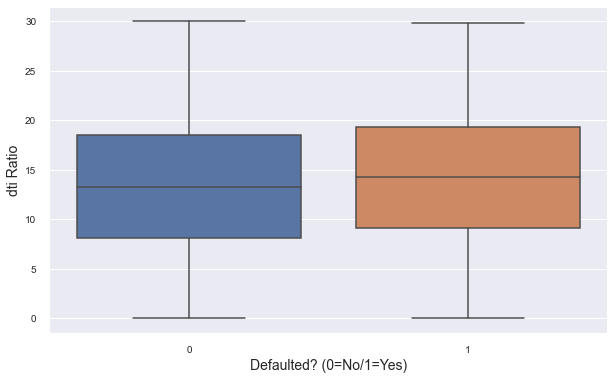

In [48]:
# Boxplot with dti [A ratio calculated using the borrower’s total monthly debt payments on total income]

ax= plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="defaulted", y="dti", data=loan)
ax.set_xlabel('Defaulted? (0=No/1=Yes)', fontsize=14) 
ax.set_ylabel('dti Ratio', fontsize=14)

# Observation: No real correlation between dti values between defaulted and non-default 

In [49]:
# Apply Binning on dti ratio ['0-8%', '8-16%', '16-24%', '24%+'']

loan['dtit'] = 0
loan['dti'] = loan['dti'].astype(int)
def bindti(dtip): 
    if dtip >= 0 and dtip < 8:
        return '0-8%'
    elif dtip >= 8 and dtip < 16:
        return '8-16%'
    elif dtip >= 16 and dtip < 24:
        return '16-24%'
    elif dtip >= 22:
        return '24%+'

loan['dtit'] = loan.dti.apply(bindti) 
loan['dtit']

0          24%+
1          0-8%
2         8-16%
3        16-24%
4        16-24%
          ...  
39712     8-16%
39713      0-8%
39714      0-8%
39715      0-8%
39716     8-16%
Name: dtit, Length: 39717, dtype: object

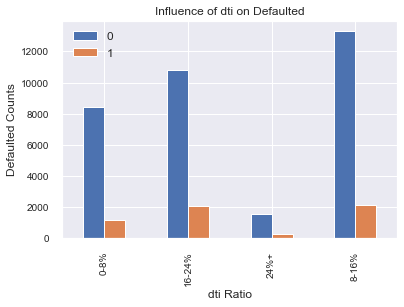

In [50]:
# Correlation between dti ratio and Defaulted after Binning 

%matplotlib inline
pd.crosstab(loan.dtit,loan.defaulted).plot(kind='bar')
plt.title('Influence of dti on Defaulted', fontsize=12)
plt.xlabel('dti Ratio', fontsize=12)
plt.ylabel('Defaulted Counts', fontsize=12)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

Text(0, 0.5, 'Ratio')

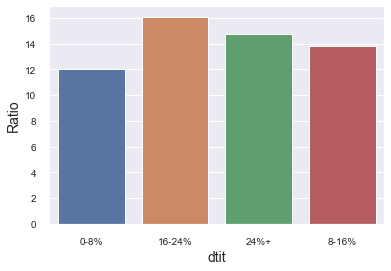

In [51]:
# Plot against Ratio of Default and dti

dtidef = loan[loan.defaulted == 1].groupby(['dtit'])[['defaulted']].count().reset_index()
dtitot = loan.groupby(['dtit'])[['defaulted']].count().reset_index()
dtifull = pd.merge(dtidef, dtitot, left_on='dtit', right_on='dtit', how='left')
dtifull.rename(columns={"defaulted_x": "Defaulted", "defaulted_y": "Totals"})
dtifull['Ratio'] = dtifull.defaulted_x/dtifull.defaulted_y*100
ax = sns.barplot(x=dtifull.dtit, y=dtifull.Ratio)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('dtit', fontsize=14)
plt.ylabel('Ratio', fontsize=14)

# Observation: >15% default ratio for 'dti ratio of 16-24%' - highest 

### `Influence on default by tenure of employment`

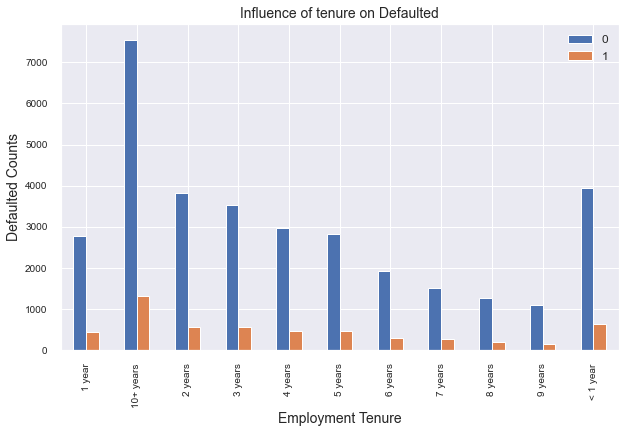

In [52]:
# Influence of length of employment

%matplotlib inline
pd.crosstab(loan.emp_length,loan.defaulted).plot(kind='bar', figsize=(10,6))
plt.title('Influence of tenure on Defaulted', fontsize=14)
plt.xlabel('Employment Tenure', fontsize=14)
plt.ylabel('Defaulted Counts', fontsize=14)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend(fontsize=12)

# Observation: No real exception observed

In [53]:
ct = pd.crosstab(loan.emp_length,loan.defaulted)
ct['ratio'] = ct[1]/ct[0]*100
ct

defaulted,0,1,ratio
emp_length,,,
1 year,2784,456,16.379310
10+ years,7548,1331,17.633810
2 years,3821,567,14.839047
3 years,3540,555,15.677966
4 years,2974,462,15.534633
5 years,2824,458,16.218130
6 years,1922,307,15.972945
7 years,1510,263,17.417219
8 years,1276,203,15.909091


Can apply binning on length of employment to find out category-wise default ratio

Text(0, 0.5, 'Ratio')

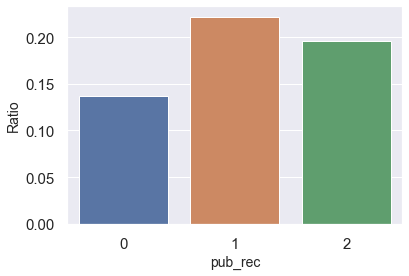

In [54]:
# Plot against Ratio of Default and pub_rec

df_pr = loan[loan.defaulted == 1].groupby(['pub_rec'])[['defaulted']].count().reset_index()
df_prtot = loan.groupby(['pub_rec'])[['defaulted']].count().reset_index()
df_prfull = pd.merge(df_pr, df_prtot, left_on='pub_rec', right_on='pub_rec', how='left')
df_prfull['Ratio'] = df_prfull.defaulted_x/df_prfull.defaulted_y
ax = sns.barplot(x=df_prfull.pub_rec, y=df_prfull.Ratio)
sns.set(font_scale = 1)
ax.set_xticklabels(df_prfull.pub_rec)
plt.xlabel('pub_rec', fontsize=14)
plt.ylabel('Ratio', fontsize=14)

[Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0')]

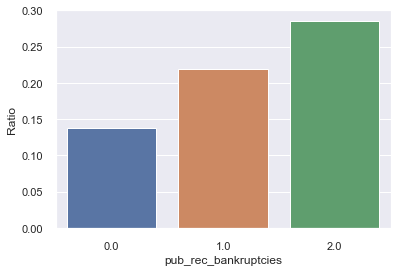

In [55]:
# Plot against Ratio of Default and pub_rec_bankruptcies

df_prb = loan[loan.defaulted == 1].groupby(['pub_rec_bankruptcies'])[['defaulted']].count().reset_index()
df_prbtot = loan.groupby(['pub_rec_bankruptcies'])[['defaulted']].count().reset_index()
df_prbfull = pd.merge(df_prb, df_prbtot, left_on='pub_rec_bankruptcies', right_on='pub_rec_bankruptcies', how='left')
df_prbfull['Ratio'] = df_prbfull.defaulted_x/df_prbfull.defaulted_y
ax = sns.barplot(x=df_prbfull.pub_rec_bankruptcies, y=df_prbfull.Ratio)
sns.set(font_scale = 1)
ax.set_xticklabels(df_prbfull.pub_rec_bankruptcies)

# Observations: Bowrrowers with pub_rec_bankruptcies value 2 have a much higher propensity to default

In [56]:
# Apply Binning on total_acc ['0-20', '20-40', '40-60', '60+'']

loan['tacc'] = 0
loan['total_acc'] = loan['total_acc'].astype(int)
def bintacc(ptacc): 
    if ptacc >= 0 and ptacc < 20:
        return '0-20'
    elif ptacc >= 20 and ptacc < 40:
        return '20-40'
    elif ptacc >= 40 and ptacc < 60:
        return '40-60'
    elif ptacc >= 60:
        return '60+'

loan['tacc'] = loan.total_acc.apply(bintacc) 
loan['tacc']

0         0-20
1         0-20
2         0-20
3        20-40
4        20-40
         ...  
39712    40-60
39713     0-20
39714    20-40
39715    20-40
39716     0-20
Name: tacc, Length: 39717, dtype: object

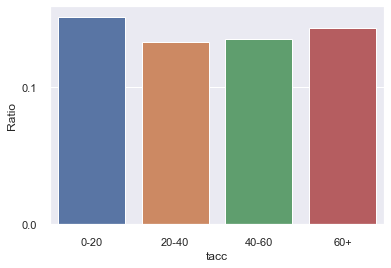

In [57]:
# Plot against Ratio of Default and total_acc (total number of credit lines)

tacc = loan[loan.defaulted == 1].groupby(['tacc'])[['defaulted']].count().reset_index()
tactot = loan.groupby(['tacc'])[['defaulted']].count().reset_index()
tacfull = pd.merge(tacc, tactot, left_on='tacc', right_on='tacc', how='left')
tacfull.rename(columns={"defaulted_x": "Defaulted", "defaulted_y": "Totals"})
tacfull['Ratio'] = tacfull.defaulted_x/tacfull.defaulted_y
tacfull
ax = sns.barplot(x=tacfull.tacc, y=tacfull.Ratio)
sns.set(font_scale = 5)

In [58]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']*100
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475.0,74.0,1279.0,1828.0,25.984683
10,renewable_energy,19.0,1.0,83.0,103.0,18.446602
3,educational,56.0,0.0,269.0,325.0,17.230769
9,other,633.0,128.0,3232.0,3993.0,15.852742
8,moving,92.0,7.0,484.0,583.0,15.780446
5,house,59.0,14.0,308.0,381.0,15.485564
7,medical,106.0,12.0,575.0,693.0,15.295815
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,14.843624
12,vacation,53.0,6.0,322.0,381.0,13.910761
4,home_improvement,347.0,101.0,2528.0,2976.0,11.659946


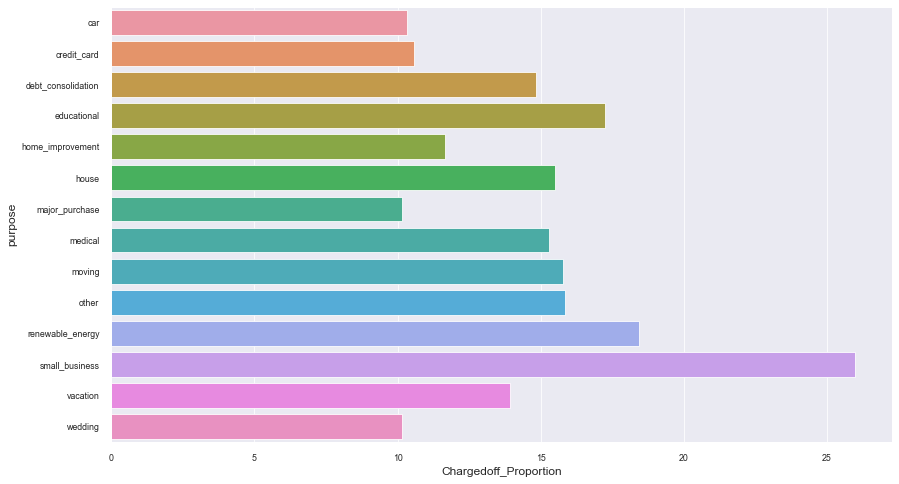

In [59]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

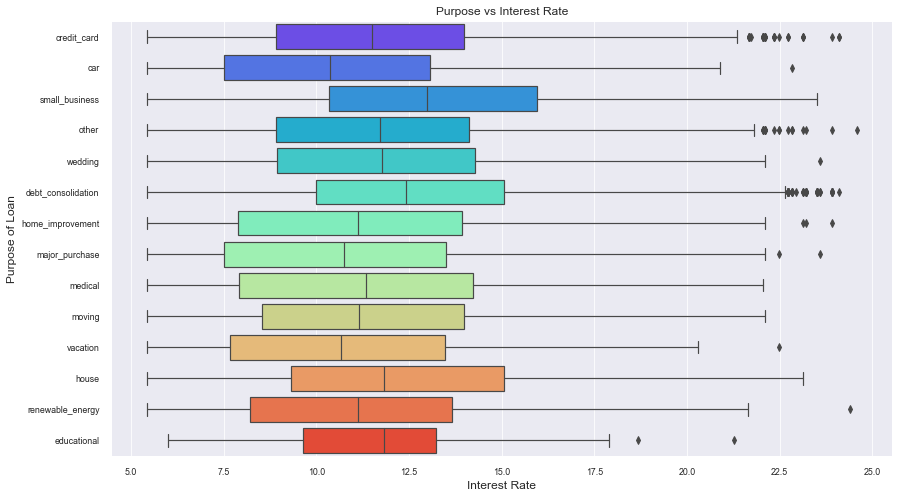

In [60]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate_num', y='purpose', data =loan, palette='rainbow')
ax.set_title('Purpose vs Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Purpose of Loan')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.
# Both of these features have many outlier on the upper end that may lead to default. 

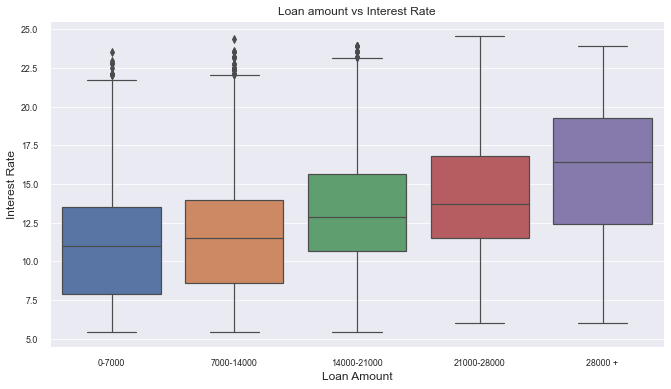

In [61]:
# Understand relationship between Loan Amount vs Interest Rate

# Create a loan amount category field with various brackets

loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], 
                                labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
plt.figure(figsize=(11,6))
ax = sns.boxplot(y='int_rate_num', x='loan_amnt_cats', data=loan)
ax.set_title('Loan amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
plt.show()

# Observations: Higher the loan_amount, higher the interest rate.

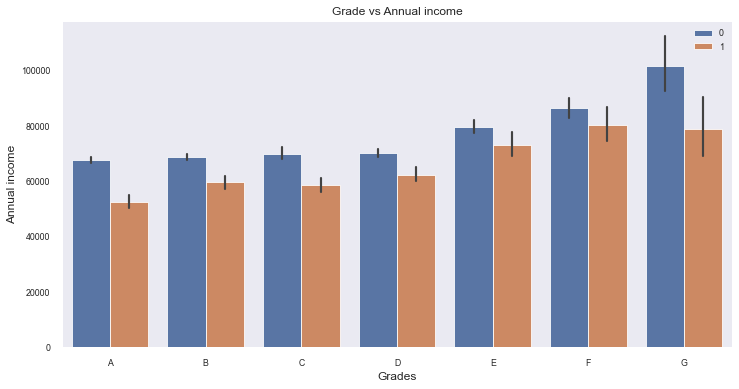

In [62]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
plt.figure(figsize=(12,6))
sns.set_style("dark")
ax=sns.barplot(x='grade', y='annual_inc', hue="defaulted", data=loan, estimator=np.mean, order='ABCDEFG')
ax.set_title('Grade vs Annual income')
ax.set_ylabel('Annual income')
ax.set_xlabel('Grades')
plt.legend()
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have much lower average annual incomes

### `Find out Correlation between Interest Rate and Default`

In [63]:
# Apply Binning on interest amount ['0-8%', '8-13%', '13-18%, '18%+']

loan['int_ratet'] = 0
loan['int_rate'] = loan['int_rate'].str.replace('\%', '')
loan['int_rate'] = loan['int_rate'].astype(float)
def bininst(tinrst): 
    if tinrst >= 0 and tinrst < 8:
        return '0-8%'
    elif tinrst >= 8 and tinrst < 13:
        return '8-13%'
    elif tinrst >= 13 and tinrst < 18:
        return '13-18%'
    elif tinrst >= 18:
        return '18%+'

loan['int_ratet'] = loan.int_rate.apply(bininst) 
loan['int_ratet']

0         8-13%
1        13-18%
2        13-18%
3        13-18%
4         8-13%
          ...  
39712     8-13%
39713     8-13%
39714     8-13%
39715      0-8%
39716    13-18%
Name: int_ratet, Length: 39717, dtype: object

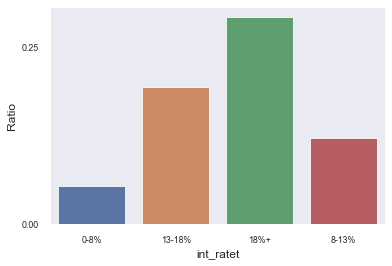

In [64]:
# Plot against Ratio of Default and Interest Amount

dtidef = loan[loan.defaulted == 1].groupby(['int_ratet'])[['defaulted']].count().reset_index()
dtitot = loan.groupby(['int_ratet'])[['defaulted']].count().reset_index()
dtifull = pd.merge(dtidef, dtitot, left_on='int_ratet', right_on='int_ratet', how='left')
dtifull.rename(columns={"defaulted_x": "Defaulted", "defaulted_y": "Totals"})
dtifull['Ratio'] = dtifull.defaulted_x/dtifull.defaulted_y
dtifull
ax = sns.barplot(x=dtifull.int_ratet, y=dtifull.Ratio)
sns.set(font_scale = 11)

# Observation: Default ration for loans with interest of 18% and higher of markedly high

<p style="background-color:Orange;">We have completed our Exploratory Data Analysis process on the Lending Club Data. There are a number of Observations that we have come up with which we would like to present to the management of Lending Club to place due consideration on their products and customer segmentation approaches that would reduce Default rate.</p>

## `Observations:`

- `Plotting the Annual Incomes`: Took a 99% cut of Annual Income that removed high outliers and shows a meaningful comparison. It does show a tendency towards more Defaults by people having lesser incomes. Annual Income do have a degree of -ve correlation with Default rate. 0-30K income bracket show a significantly high Default rate. Default rate of people in income bracket of 0-30K taking loans >20K is extremely high - ~50%. Even, Default rate of people in income bracket of 0-30K taking loans 10K-20K is high - ~25%. These combinations must be removed. 

- `Grade/Sub-Grade`: Products with certain grade/sub-grade combinations lead to high to very high Defaults and should be looked at. 

- `State`: Applicants from Nebraska have very High Default Ratio – 60% but in a very small population. Alaska and South Dakota observe moderately high Default ratio - ~18%. 

- `Purpose`: “Small Business” purpose loans tend to show a very high Default trend. Other than that, Renewable Energy loans have a moderately high default rate. Avoid requests with these types. 

- `Funded Amount` has a +ve correlation with Defaulted. Loans > 20K have significantly higher Default rate than 0-10K. Instalment Amount has a small +ve correlation with Defaulted. 

- `Interest Rate Amount` has a very high +ve correlation with Defaulted. Loans with 18% and higher rates show a much higher default rate. Consider lower rate loans more. 

- From the Plotting of `dti Ratio`, there is a upward trend of Defaults as the dti ratio goes higher. Focusing on Customers with Lower dti Ratios is better for bringing down Default Ratio. 

- `Pub_rec_bankruptcies`: High +ve correlation of Default to number of pub_rec_bankruptcies. Avoid customers with any Bankruptcy record. 

- `Pub_rec`: Customers with any derogatory public record has more propensity to default. Avoid customers with any Derogatory record. 

- `Term`: 60 months tenured loans show a much higher default rate. Avoid lower tenured loans. 

- `Emp_title`: (company name): Slide 25 - An analysis is carried out to find out companies from which > 20 employees have taken Credit from Lending club and has high Default Rate. These companies are worth being careful about. 

